## Projects in Data Science - Exercises for the Annotation lectures

In these exercises you will use some generated and exisiting (collected from human observer) data, to practice working with inter-observer agreement.

The existing data we are working with are annotations made for skin lesion images from the ISIC archive (https://www.isic-archive.com/). The annotations describe different characteristics of how the lesion look - for example, whether they are asymmetric or not.


You can download the data here: https://figshare.com/s/5cbbce14647b66286544?file=11886200


Each row is a different image, and each column is a different feature done by a specific annotator. For example: Asymmetry_7_1 is the feature Asymmetry annotated by annotator 7_1. There are 100 lesions, each of which was annotated by six annotators in total, five different features, and six different annotators. The feature are either binary, or ordinal.   

These annotations were made in 2017 by students at TU Eindhoven. You can (optionally) read more about the background and how the annotations can be used in these papers:

* https://arxiv.org/pdf/1806.08174
* https://www.melba-journal.org/papers/2021:020.html



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load skin lesion annotations as a dataframe
# We generally prefer to use a csv but this data is provided in excel format.
# You may need to install the openpyxl package to read excel files, or convert this to csv.

df = pd.read_excel('group07.xlsx')

In [3]:
# For this task, we are only interesting in the annotations, and so we can drop the other columns
df.drop(columns=['Keratosis', 'Melanoma', 'Age', 'Sex'], axis=1,inplace=True) #Inplace=True modifies the dataframe directly, rather than returning a new dataframe

In [4]:
df.describe() #Describe gives us some summary statistics of numerical coloumns in the dataframe

,Asymmetry_7_1,Color_7_1,Border_7_1,Dermo_7_1,Blue_7_1,Asymmetry_7_2,Color_7_2,Border_7_2,Dermo_7_2,Blue_7_2,...,Asymmetry_7_5,Color_7_5,Border_7_5,Dermo_7_5,Blue_7_5,Asymmetry_7_6,Color_7_6,Border_7_6,Dermo_7_6,Blue_7_6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,98.000000,99.000000,98.000000,99.000000,99.000000
mean,1.420000,1.980000,0.840000,0.550000,0.200000,1.130000,2.920000,0.59000,1.09000,0.310000,...,0.83000,2.810000,0.600000,1.080000,0.160000,1.000000,1.777778,0.387755,0.787879,0.141414
std,0.741007,1.171893,0.368453,0.625631,0.402015,0.747454,1.051022,0.51434,0.51434,0.597892,...,0.75284,1.152029,0.492366,0.580491,0.368453,0.625901,0.931923,0.489743,0.718171,0.350222
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.00000,1.00000,0.000000,...,0.00000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.00000,1.00000,0.000000,...,1.00000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.00000,1.00000,0.000000,...,1.00000,3.250000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,2.000000,5.000000,1.000000,2.000000,1.000000,2.000000,6.000000,2.00000,2.00000,2.000000,...,2.00000,6.000000,1.000000,2.000000,1.000000,2.000000,5.000000,1.000000,2.000000,1.000000


In [5]:
# Info tells us what type of data is in each column, and how many non-null values there are
# Depending what we want to do with the data, we may need to do something with those nulls.
# We might also need to convert some columns to a different type, but right now, this will be fine.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             100 non-null    object 
 1   Asymmetry_7_1  100 non-null    int64  
 2   Color_7_1      100 non-null    int64  
 3   Border_7_1     100 non-null    int64  
 4   Dermo_7_1      100 non-null    int64  
 5   Blue_7_1       100 non-null    int64  
 6   Asymmetry_7_2  100 non-null    int64  
 7   Color_7_2      100 non-null    int64  
 8   Border_7_2     100 non-null    int64  
 9   Dermo_7_2      100 non-null    int64  
 10  Blue_7_2       100 non-null    int64  
 11  Asymmetry_7_3  96 non-null     float64
 12  Color_7_3      98 non-null     float64
 13  Border_7_3     98 non-null     float64
 14  Dermo_7_3      98 non-null     float64
 15  Blue_7_3       98 non-null     float64
 16  Asymmetry_7_4  99 non-null     float64
 17  Color_7_4      100 non-null    int64  
 18  Border_7_4 

In [6]:
## List comprehension to pick out all column names with 'Blue' in
# This lets us get all 6 annotators' annotations for the 'Blue' feature in one go
[x for x in df.columns if 'Blue' in x]

['Blue_7_1', 'Blue_7_2', 'Blue_7_3', 'Blue_7_4', 'Blue_7_5', 'Blue_7_6']

<Axes: >

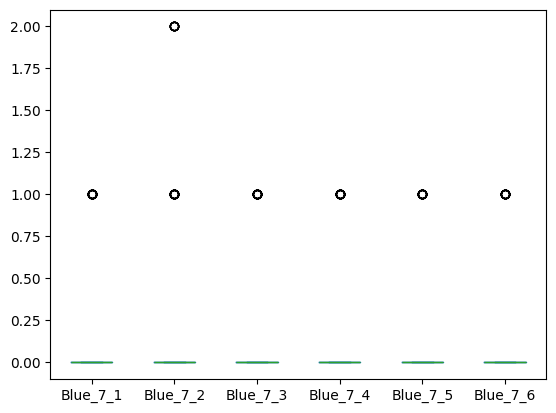

In [7]:
# We can use our list comphrehension to plot a boxplot of these, for example
# Box plots are another way to view summary statistics and sometimes lets us spot interesting things
#Typically: 
# The green line is the median, the box is the interquartile range, and the whiskers are the min and max values
# dots represent values outside of the whiskers, ie possible outliers
# 'Blue' however doesn't make for great box plots (try changing to different features to see the difference)
# However, we can see annotator 2 has some strange results as the annotations should be [0,1]


df[[x for x in df.columns if 'Blue' in x]].plot(kind='box')

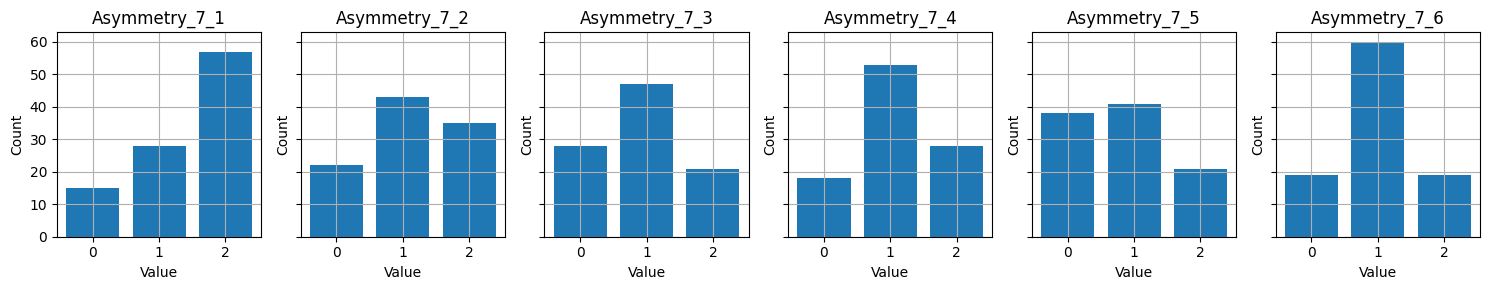

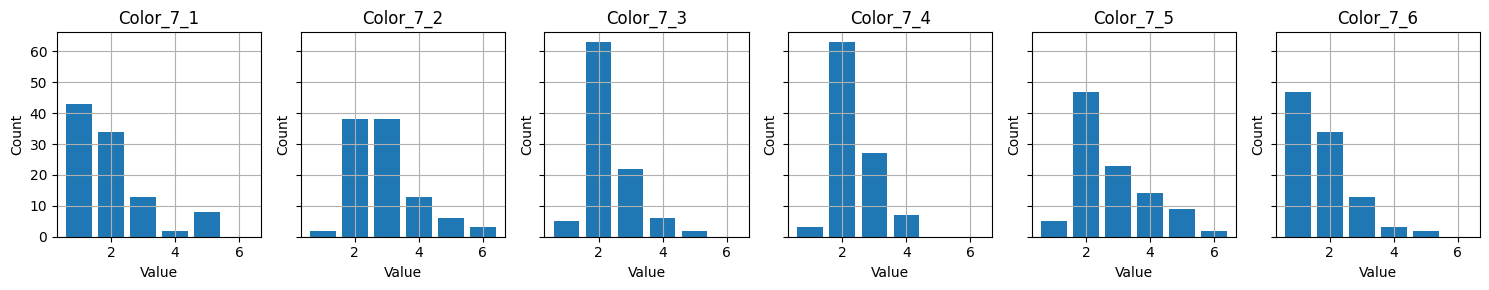

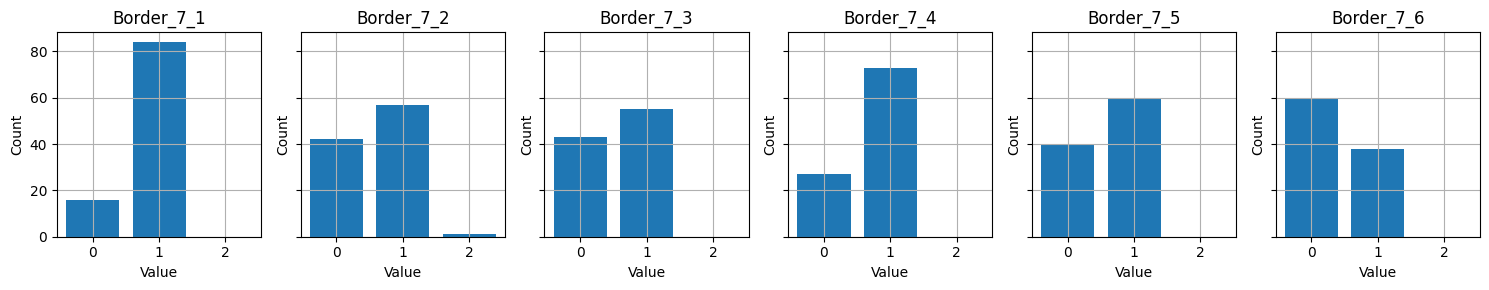

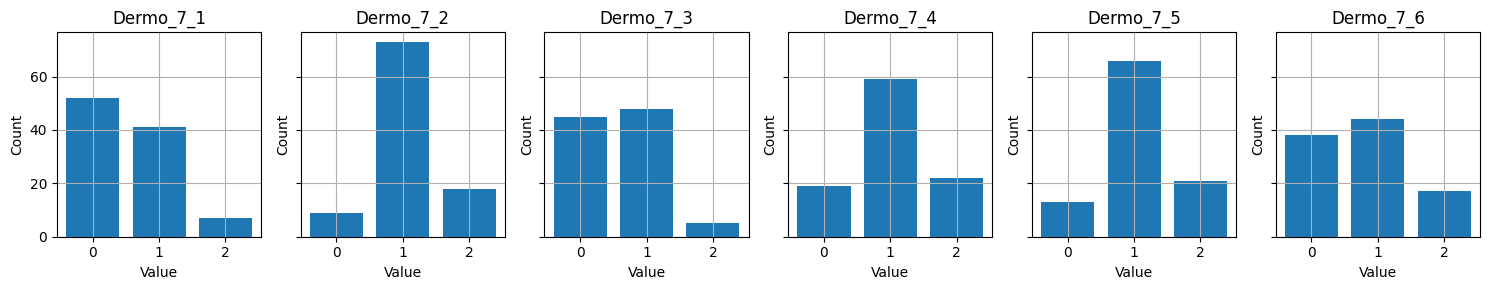

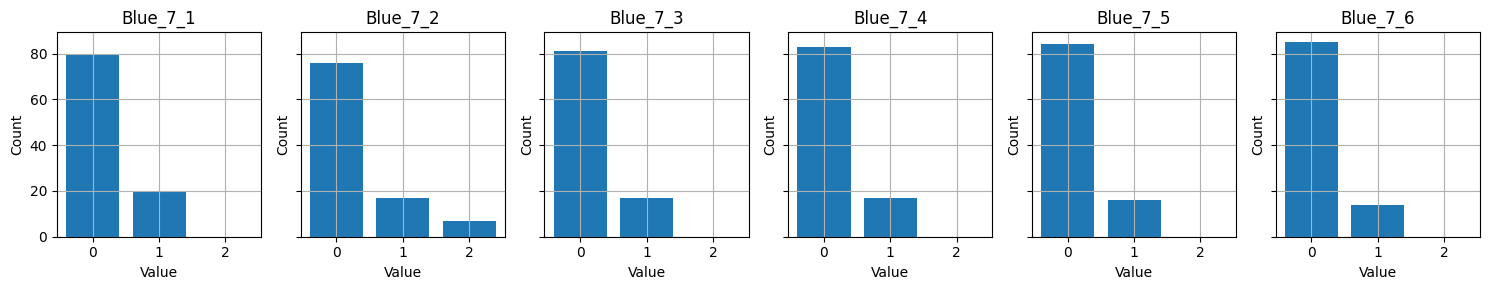

In [8]:
# It can also be interesting to compare distributions,
# Depending on the data, histograms might be better than bar plots

feats = ['Asymmetry', 'Color', 'Border', 'Dermo', 'Blue'] # Each feature we want to consider

for feature in feats: #loop through our featutes
    _,ax = plt.subplots(1,6,figsize=(15,3), sharex=True, sharey=True) #this creates a 1X6 grid for each feature
    #ax = ax.flatten() #not needed for a single row, but if you want to change to figsize=(3,2), this makes plotting simpler
    for i in range(6): #hardcoding values is usually a bad idea, but in this instance, we know we have 6 annotators so it will be fine
        counts = df[f'{feature}_7_{i+1}'].value_counts() #count the number of each value in the column f'feature_7_{i+1}'  (f'' is a f-string, which lets us insert variables into strings, as we know the column names follow this pattern)
        ax[i].bar(counts.index, counts.values) #make a bar plot of the counts
        ax[i].set_title(f'{feature}_7_{i+1}') #set the title of the plot, this is usually a good idea to make good plots
        ax[i].set_xlabel('Value') #set the x-axis label
        ax[i].set_ylabel('Count') #set the y-axis label
        ax[i].grid(True) #adds gridlines, which can make it easier to read the plot, but you can comment out if you prefer

    plt.tight_layout()

## How often do annotators agree?

Select Blue which is a binary feature, for two different annotators. Calculate how often they agree in percent. This is the same as the accuracy metric but you can do this without any imports.



In [9]:
## Select two annotators and compute observed agreement ("accuracy")

def observed_agreement(df, annotator1, annotator2):
    '''ooh docstings - these are good practice to help others understand what your function does.
    And yourself when you look back on this next year and wonder what you were thinking.
    This function takes a dataframe, and two column names, 
    and returns the observed agreement between the two annotators'''
    return 100 *sum(df[annotator1] == df[annotator2])/df.shape[0] # == is a boolen comparison, so this will return True if the two values are the same, and False if they are different. Python lets us treat True as 1 and False as 0, so we can sum these to get the number of agreements.




print(observed_agreement(df, 'Blue_7_1', 'Blue_7_2'))
print(observed_agreement(df, 'Blue_7_1', 'Blue_7_3'))

82.0
90.0


In [10]:
## A small aside to think about, if you are interested

# We had some null values when we explored the data earlier
# What happens if we compare two annotators when there is null values?

print(observed_agreement(df, 'Blue_7_6', 'Blue_7_6')) #This column has a null, and when we check, there is only a 99% agreement - with itself!
# This is because the null value is not equal to itself, and so the comparison returns False.

print(df[df['Blue_7_6'].isna()]['Blue_7_6']) #confirm there is a null value in this column

# You may wish to consider how this could be handled in your analysis - there isn't necessarily a _right_ answer, as it will depend on the data *and* the question you are asking

99.0
65   NaN
Name: Blue_7_6, dtype: float64


Make a 6x6 array where you loop through the different annotators, and calculate their agreement. You should see that for all annotator pairs, the percentage of agreement is between 80 and 90.


In [11]:
## Loop through the annotators

agreements = np.zeros((6,6)) # Create an empty array to store the agreements, this lets me access them again later without recalculating

for i in range(1,7):
    for j in range(i+1,7): #Generally we want to avoid nested loops, but sometimes we can't - also sometimes it makes our code easier to understand
        agreements[i-1,j-1] = observed_agreement(df, f"Blue_7_{i}", f"Blue_7_{j}") #calc the observed agreement between each pair and store it in the array

print(agreements)

[[ 0. 82. 90. 83. 82. 83.]
 [ 0.  0. 81. 77. 78. 77.]
 [ 0.  0.  0. 86. 82. 87.]
 [ 0.  0.  0.  0. 87. 94.]
 [ 0.  0.  0.  0.  0. 87.]
 [ 0.  0.  0.  0.  0.  0.]]


## How can we interpret this agreement measure?

Look at how often each annotator found that the lesion has value 1 for the Blue feature.


In [12]:
## Find how often each annotator thought the lesion had the Blue feature
blue = df[[x for x in df.columns if 'Blue' in x]].copy() #creates a new dataframe with only the Blue columns. Now I won't accidentally change the original dataframe, in case I need it later.

print(blue.sum()) #hmm, maybe this isn't great, remember that strangeness before when annotator 2 gave a 2 for Blue that should have been between 0 and 1?

blue[blue==1].sum() #this is better, it only counts where it equals 1. But in a real case, we should probably make a decision on how to handle those 2s. Again, there isn't neccessarily a right answer here. We could recode (possibly introducing error), remove this annotator entirely (losing data), or something else.

Blue_7_1    20.0
Blue_7_2    31.0
Blue_7_3    17.0
Blue_7_4    17.0
Blue_7_5    16.0
Blue_7_6    14.0
dtype: float64


Blue_7_1    20.0
Blue_7_2    17.0
Blue_7_3    17.0
Blue_7_4    17.0
Blue_7_5    16.0
Blue_7_6    14.0
dtype: float64

Create a "random" feature (like an annotator who did not look at the image at all), where the Blue feature occurs as often as in the real annotations. Then again calculate the agreement. Is the result what you would expect?

In [13]:
# Create random annotation with the same prevalence of Blue and calculate the observed agreement
np.random.seed(1) # We set a seed for the random number generator so our results are reproducible. This is good practice, even if it makes it feel like its not really random.

blue['Blue_7_7'] = np.random.choice([0,1], size=blue.shape[0], p=[0.8, 0.2]) #create a random annotation with 20% of the values as 1s. Is this too high? too low? How would you decide?

blue[blue==1].sum()

Blue_7_1    20.0
Blue_7_2    17.0
Blue_7_3    17.0
Blue_7_4    17.0
Blue_7_5    16.0
Blue_7_6    14.0
Blue_7_7    19.0
dtype: float64

Select only the lesions where at least one annotator thought it had the Blue feature. Calculate the agreements again (as percentage out of 100. What do you notice?

In [14]:
# Find all lesions with at least one Blue annotation, and calculate agreement again (in %)

blue_1s = blue[blue.sum(axis=1) != 0].copy() # make a df with only the rows where at least one annotator thought the lesion had the Blue feature

agreements_1 = np.zeros((7,7))

for i in range(1,8):
    for j in range(i+1,8):
        agreements_1[i-1,j-1] = observed_agreement(blue_1s, f"Blue_7_{i}", f"Blue_7_{j}")

print(agreements_1.round(2)) #I'm rounding here for readability, as we no longer have a neat number of results

# The final column is our random annotator. Whilst the observed agreement is less than for other pairs, it still feels higher than we might have expected - maybe? This could be problem, so we want to take this random agreement into account.

[[ 0.   62.5  81.25 64.58 62.5  66.67 27.08]
 [ 0.    0.   62.5  52.08 54.17 54.17 25.  ]
 [ 0.    0.    0.   72.92 64.58 75.   31.25]
 [ 0.    0.    0.    0.   72.92 89.58 29.17]
 [ 0.    0.    0.    0.    0.   75.   35.42]
 [ 0.    0.    0.    0.    0.    0.   35.42]
 [ 0.    0.    0.    0.    0.    0.    0.  ]]


## Cohen's Kappa

As you maybe see above, total % of agreement may not reflect what you want to find out about your annotations, if the different values are not occuring equally often.

Instead let's look at the Kappa score, which adjusts for this. You can calculate it yourself it from the observed agreement (on all lesions) above. See https://en.wikipedia.org/wiki/Cohen%27s_kappa or the Viera paper on LearnIT:

In [15]:
# Calculate kappa score "by hand" (example)
def kappa(col1, col2):
    n = df.shape[0] #get length of the dataframe

    #observed agreement - how often they actually agree, either 0 or 1
    p_o = sum(col1 == col2)/n

    # how often does each rater pick category 1
    #category1, rater 1
    n_1_1 = sum(col1==1)
    #category1, rater 2
    n_1_2 = sum(col2==1)

    # how often does each rater pick category 0
    #category0, rater 1
    n_0_1 = sum(col1==0)
    #category0, rater 2
    n_0_2 = sum(col2==0)

    # calc chance agreement
    p_e = (n_1_1/n)*(n_1_2/n) + (n_0_1/n)*(n_0_2/n)

    # calc cohens-kappa
    kappa = (p_o - p_e)/(1 - p_e)

    return kappa

kappa(blue['Blue_7_1'], blue['Blue_7_2'])

0.4972067039106142

Check your answer against the Kappa score available in sklearn.metrics.

Note that this score is only for two annotators and categorical variables. For extensions of the Cohen's Kappa you will need to adapt your own function, or use other packages.

In [16]:
# Calculate Kappa score with sklearn

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(blue['Blue_7_1'], blue['Blue_7_2'])


np.float64(0.4972067039106145)

In [17]:
kappa_scores = np.zeros((6,6))

for i in range(1,7):
    for j in range(i+1,7):
        # I'm using the function I defined earlier - what happens if you switch it to the sklearn function? Hint: We never dealt with those nulls...
        kappa_scores[i-1,j-1] = kappa(df[f"Blue_7_{i}"], df[f"Blue_7_{j}"])

kappa_scores.round(3)

array([[0.   , 0.497, 0.686, 0.437, 0.392, 0.418],
       [0.   , 0.   , 0.466, 0.324, 0.342, 0.303],
       [0.   , 0.   , 0.   , 0.531, 0.384, 0.548],
       [0.   , 0.   , 0.   , 0.   , 0.528, 0.778],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.507],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])